In [1]:
#!/usr/bin/env python3
from __future__ import print_function
%matplotlib notebook
import numpy as np
import os
import matplotlib.pyplot as plt
import json
from matplotlib import rc, rcParams
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, ScalarFormatter, FormatStrFormatter
from snad.load.curves import OSCCurve
from scipy.optimize import curve_fit
from astropy.io import ascii
from scipy.integrate import quad
from math import *

In [2]:
# Physical constants
clight = 299792.458
H0 = 0.00007324 # Riess et al. 2016: H0 = 73.24 ± 1.74 km s−1 Mpc−1
omgM_scolnic = 0.3

pw = '/Users/maria/Yandex.Disk.localized/Science/Supernovae/'

In [3]:
def band_shift(x,z):
    x_new = x/(1+z)
    return x_new

In [4]:
def bazin(t, a, b, t0, tau_fall, tau_rise):
    f = a*(np.exp(-(t-t0)/tau_fall) / (1 + np.exp(-(t-t0)/tau_rise))) + b
    return f

In [5]:
# Rust-Pskovski-Phillips relation
# MV = -20.883(0.417) + 1.949(0.292)Δm15(B)
def lw_relation(a, b, dm15):
    Mv = a + b*dm15
    return Mv

In [6]:
# Comoving radial coordinate (c not included) corresponding to redshift z = c int_0^z dz/H(z)
# in LambdaCDM flat model
def intfun(z, omgM):
    return 1/sqrt(omgM*(1 + z)**3 + (1 - omgM))

In [7]:
# Luminosity Distance function
def fitfundL(zcmb, omgM):
    mu = []
    for i in range (len(zcmb)): 
        zz = zcmb[i]
        mu.append(dL_z(zz, zz, omgM)) 
    return mu 

In [8]:
# Luminosity Distance corresponding to a redshift z
def dL_z(zcmb, zhel, omgM):
    mu_zz = 5*np.log10((1 + zhel)*clight*(quad(intfun, 0, zcmb, args=(omgM))[0] / (10*H0)))
    return mu_zz

<IPython.core.display.Javascript object>


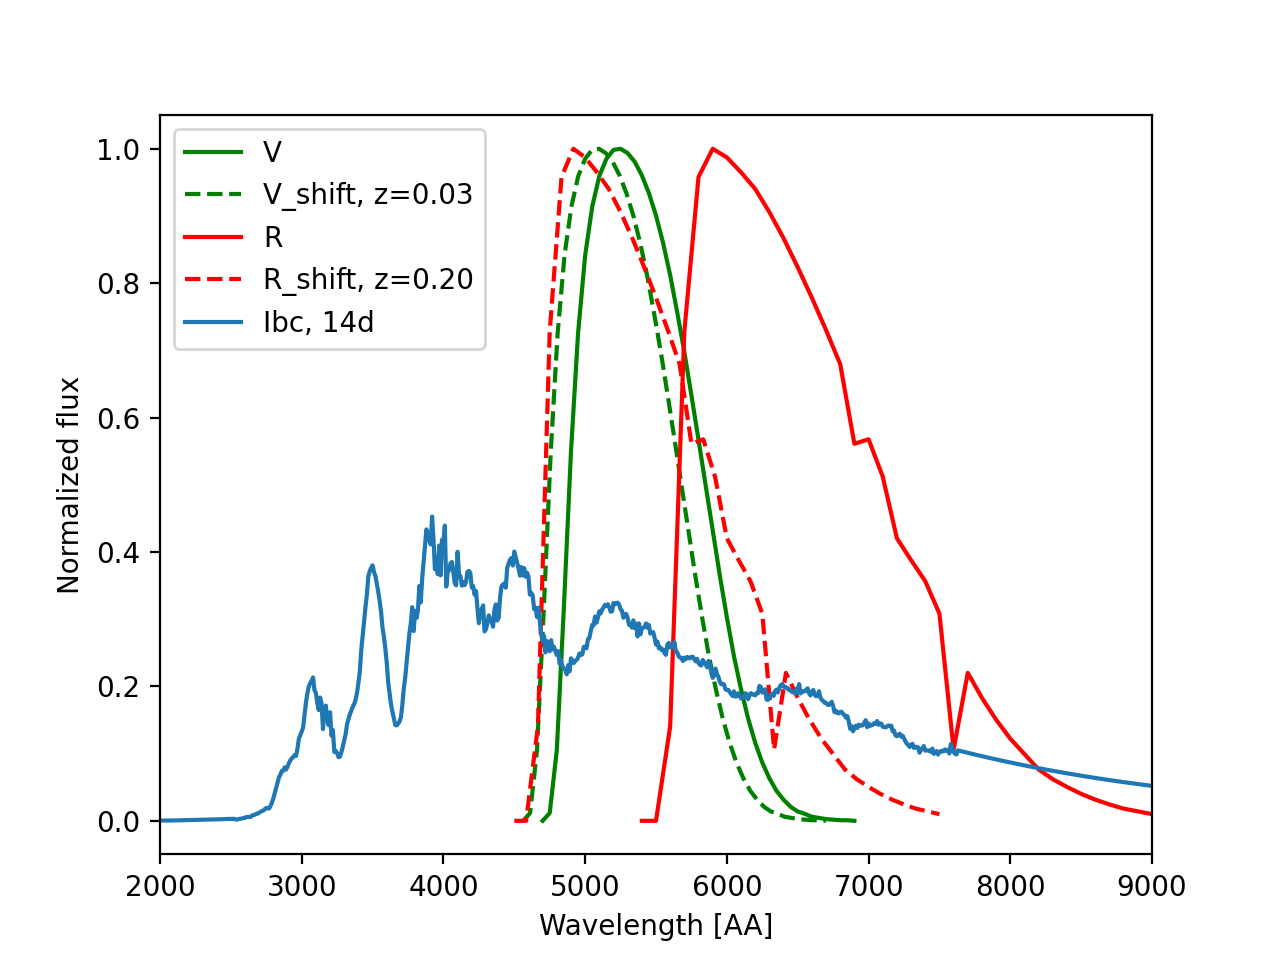

In [9]:
# choose a redshift range
z_v = 0.03
z_r = 0.20
V_band = ascii.read(pw + 'JLA_SALT2/JLA_fit/Instruments/4Shooter2/V_4Shooter2.txt')  
R_band = ascii.read(pw + 'JLA_SALT2/JLA_fit/Instruments/4Shooter2/R_4Shooter2.txt')  

spec_Ibc = ascii.read(pw + 'SN_nugent/sn1bc_flux.v1.1.dat')  

plt.plot(V_band['col1'],V_band['col2'], 'g-', label='V')
plt.plot(band_shift(V_band['col1'],z_v),V_band['col2'], 'g--', label='V_shift, z=%3.2f' %z_v)
plt.plot(R_band['col1'],R_band['col2'], 'r-', label='R')
plt.plot(band_shift(R_band['col1'],z_r),R_band['col2'], 'r--', label='R_shift, z=%3.2f' %z_r)

plt.plot(spec_Ibc['col2'][np.where(spec_Ibc['col1']==10)], spec_Ibc['col3'][np.where(spec_Ibc['col1']==10)]/np.max(spec_Ibc['col3']), label = 'Ibc, 14d')

plt.xlabel('Wavelength [AA]')
plt.ylabel('Normalized flux')
plt.xlim(2000, 9000)  
plt.legend()

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


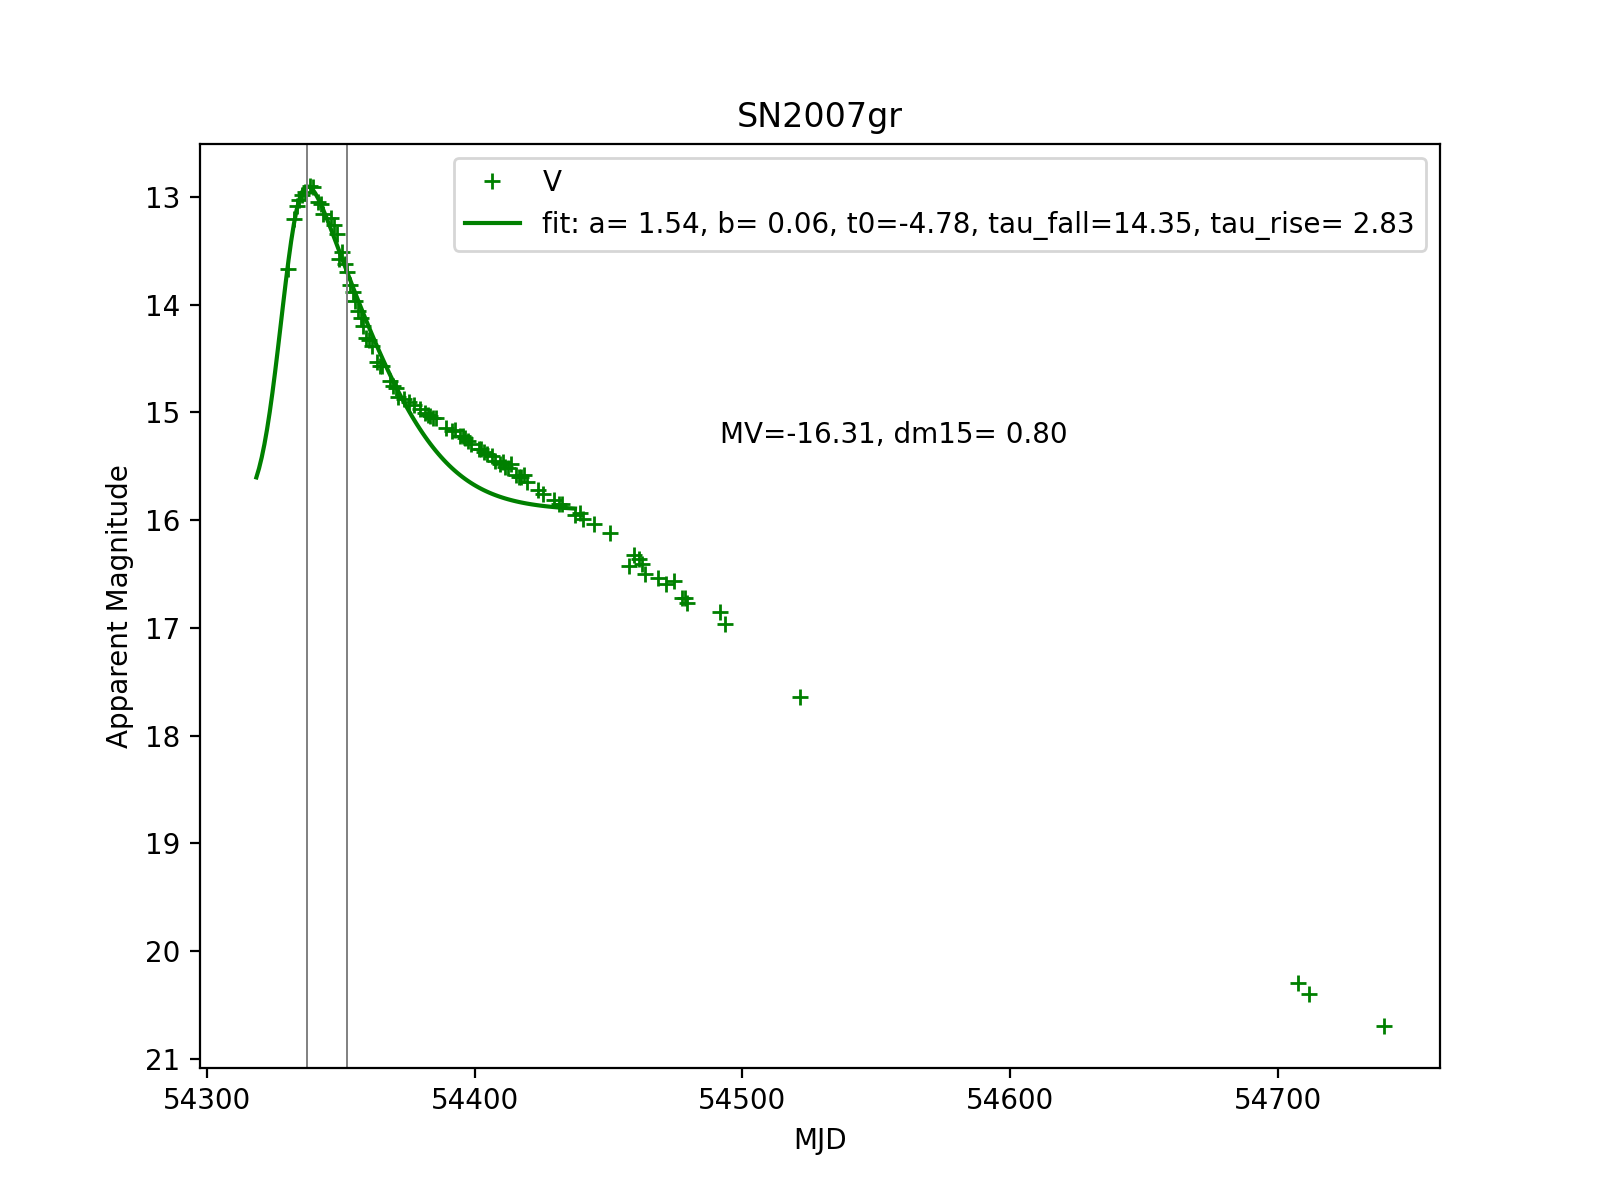

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


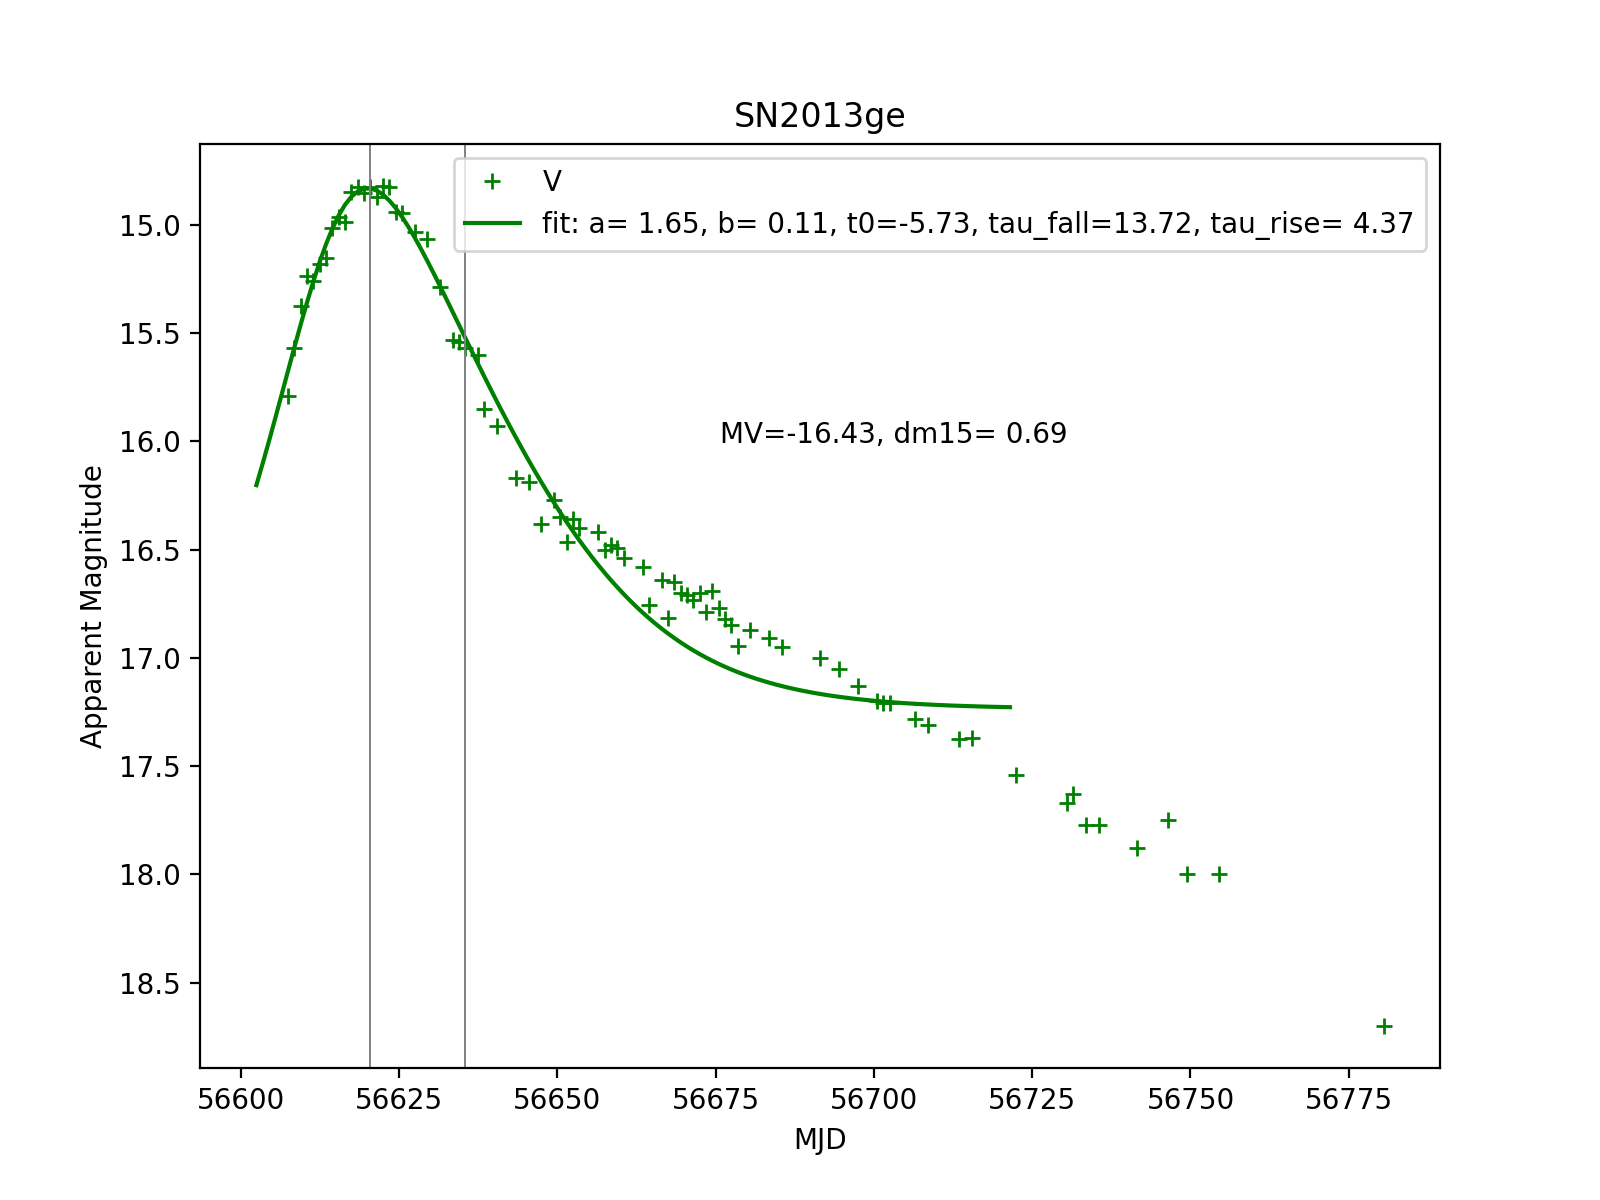

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


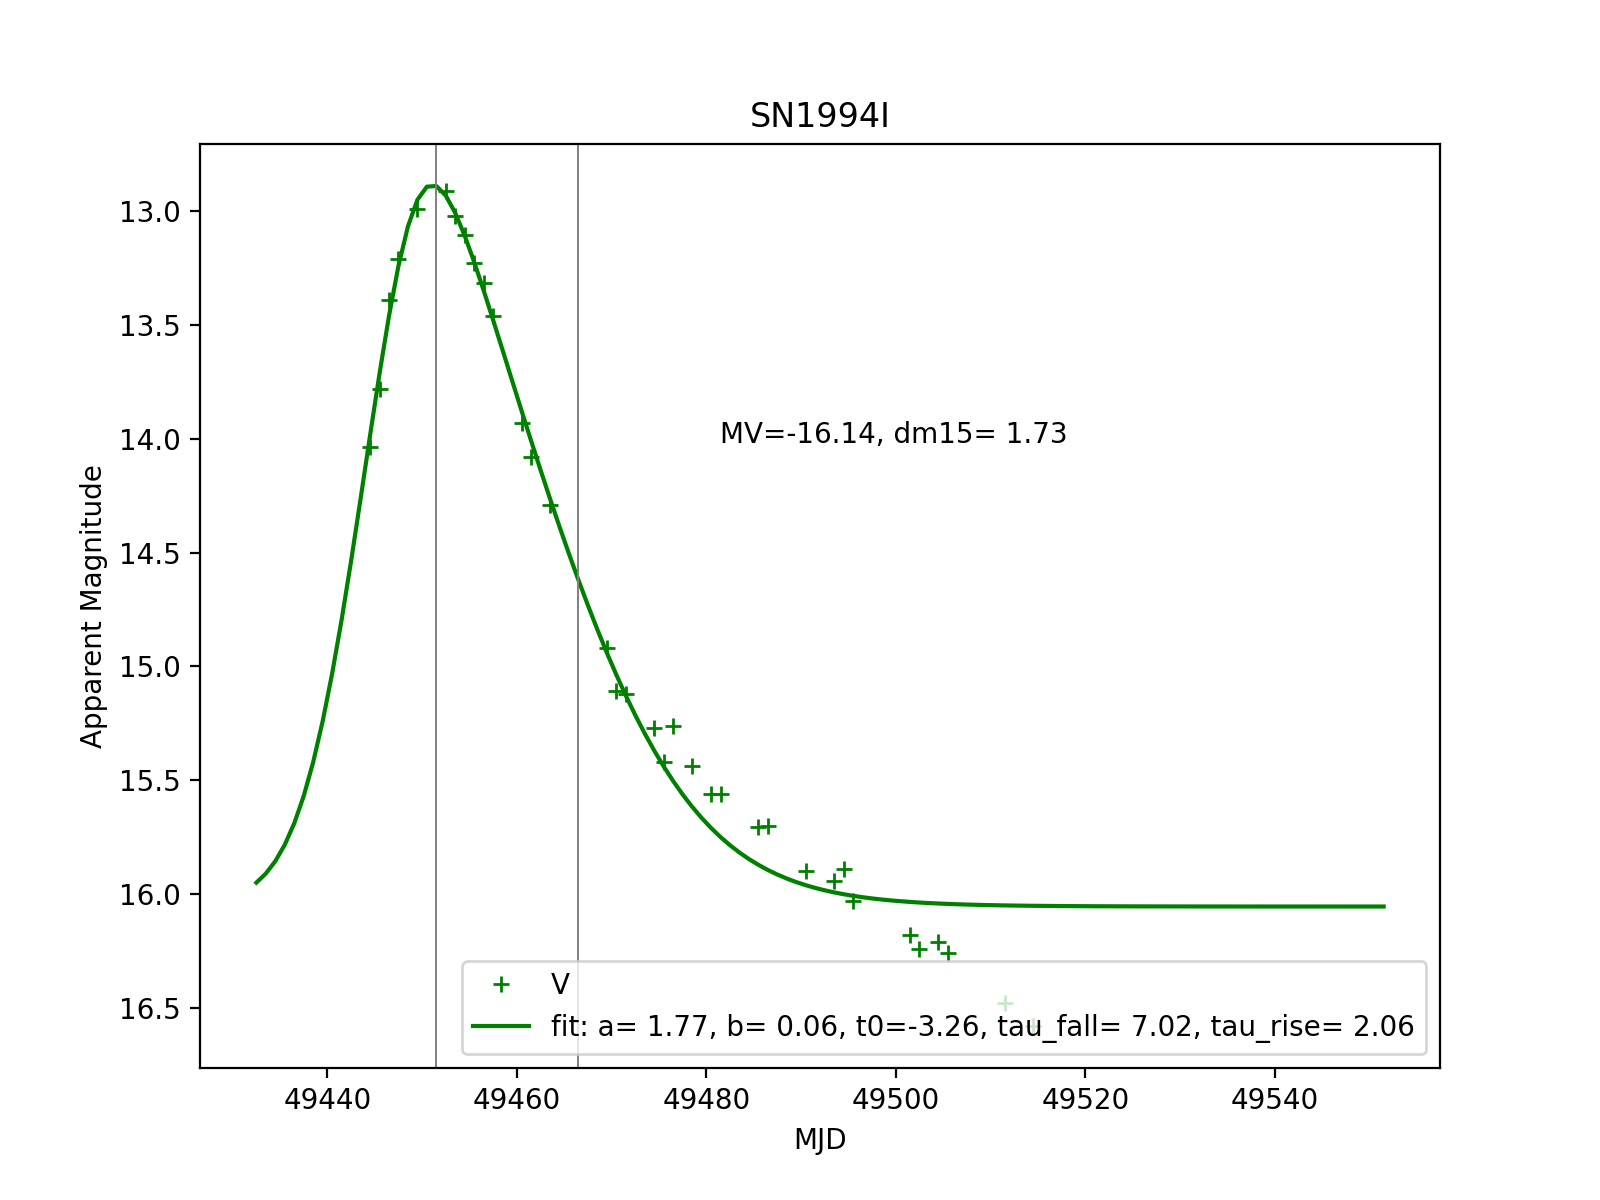

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


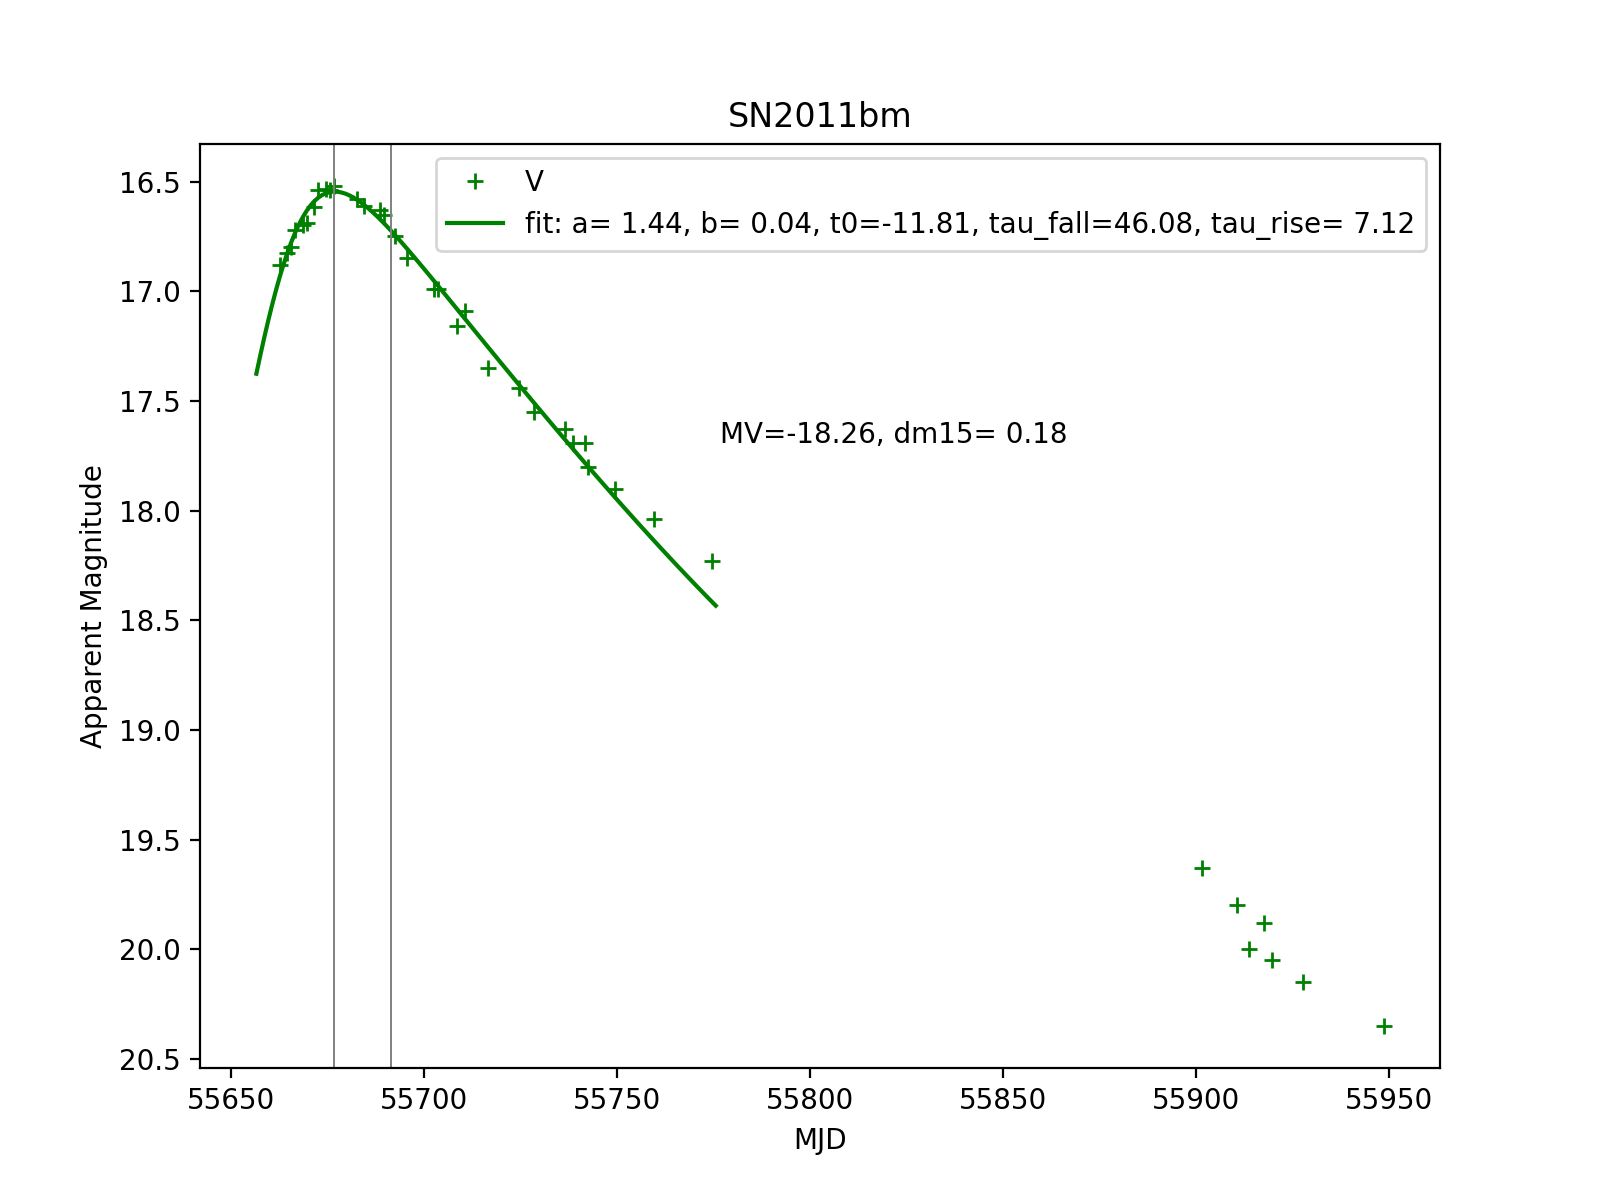

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


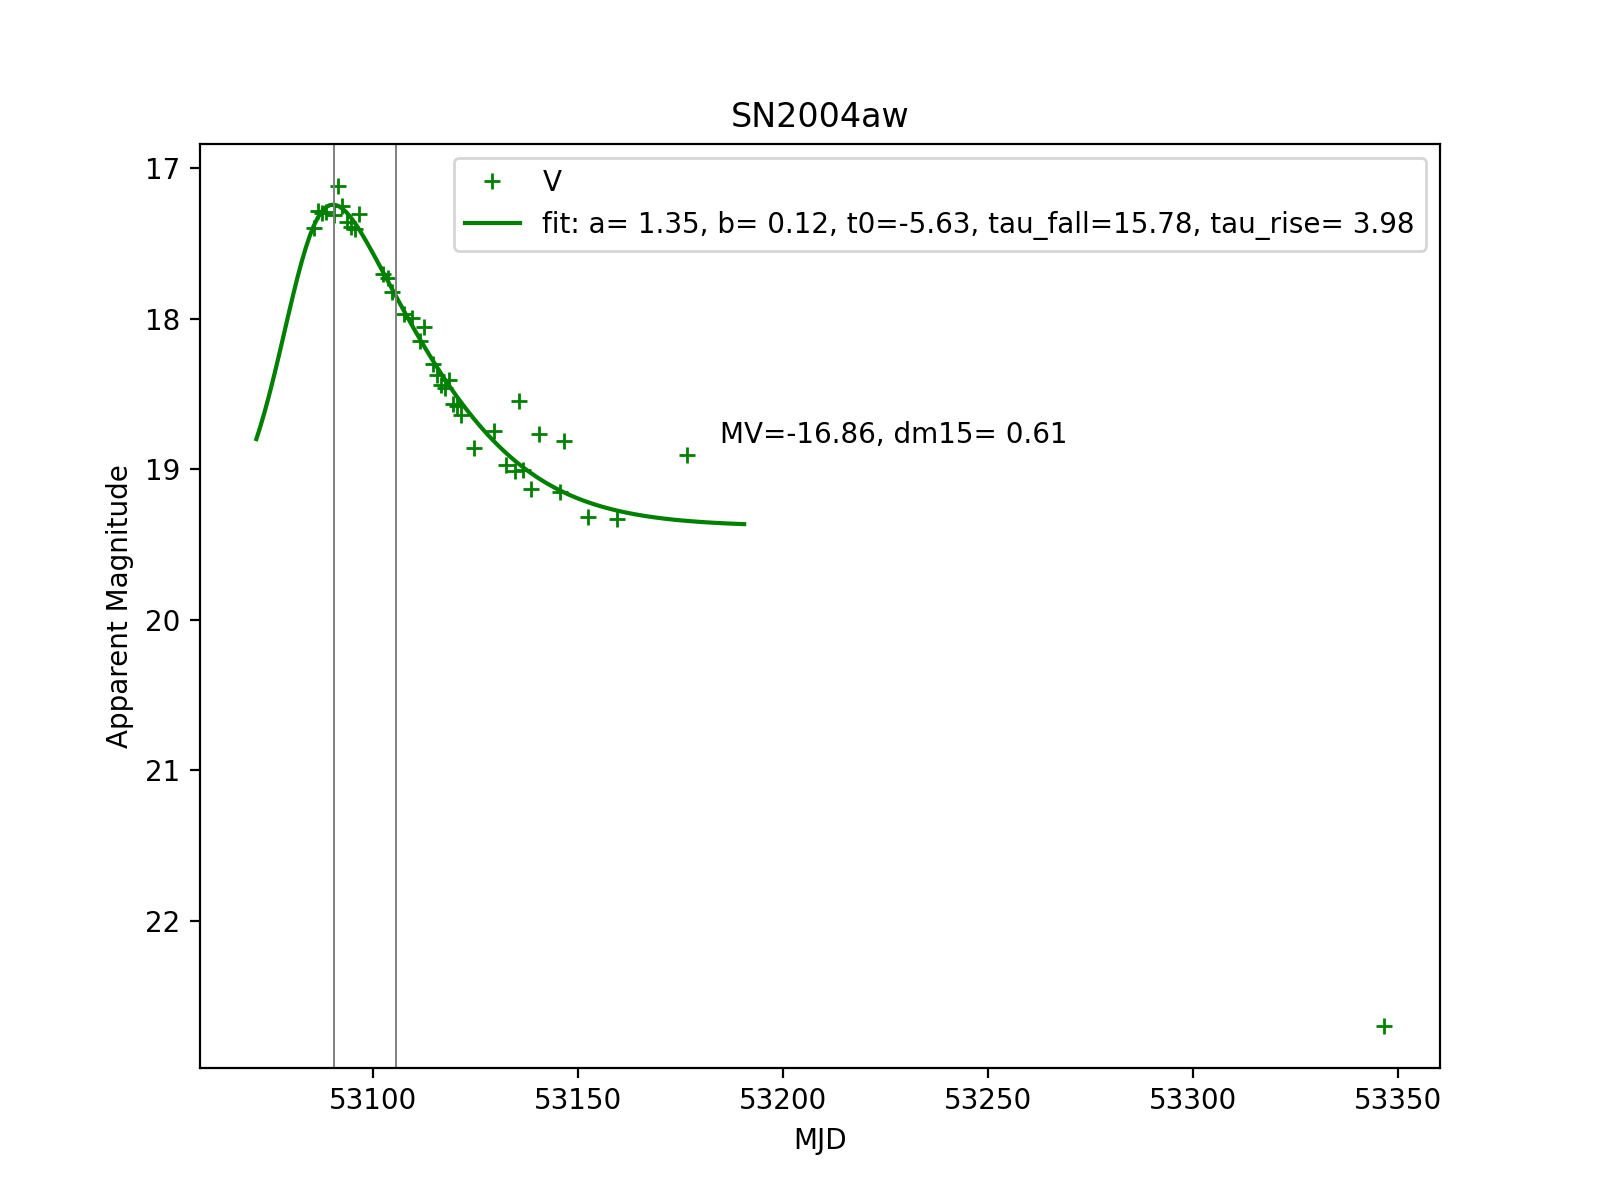

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


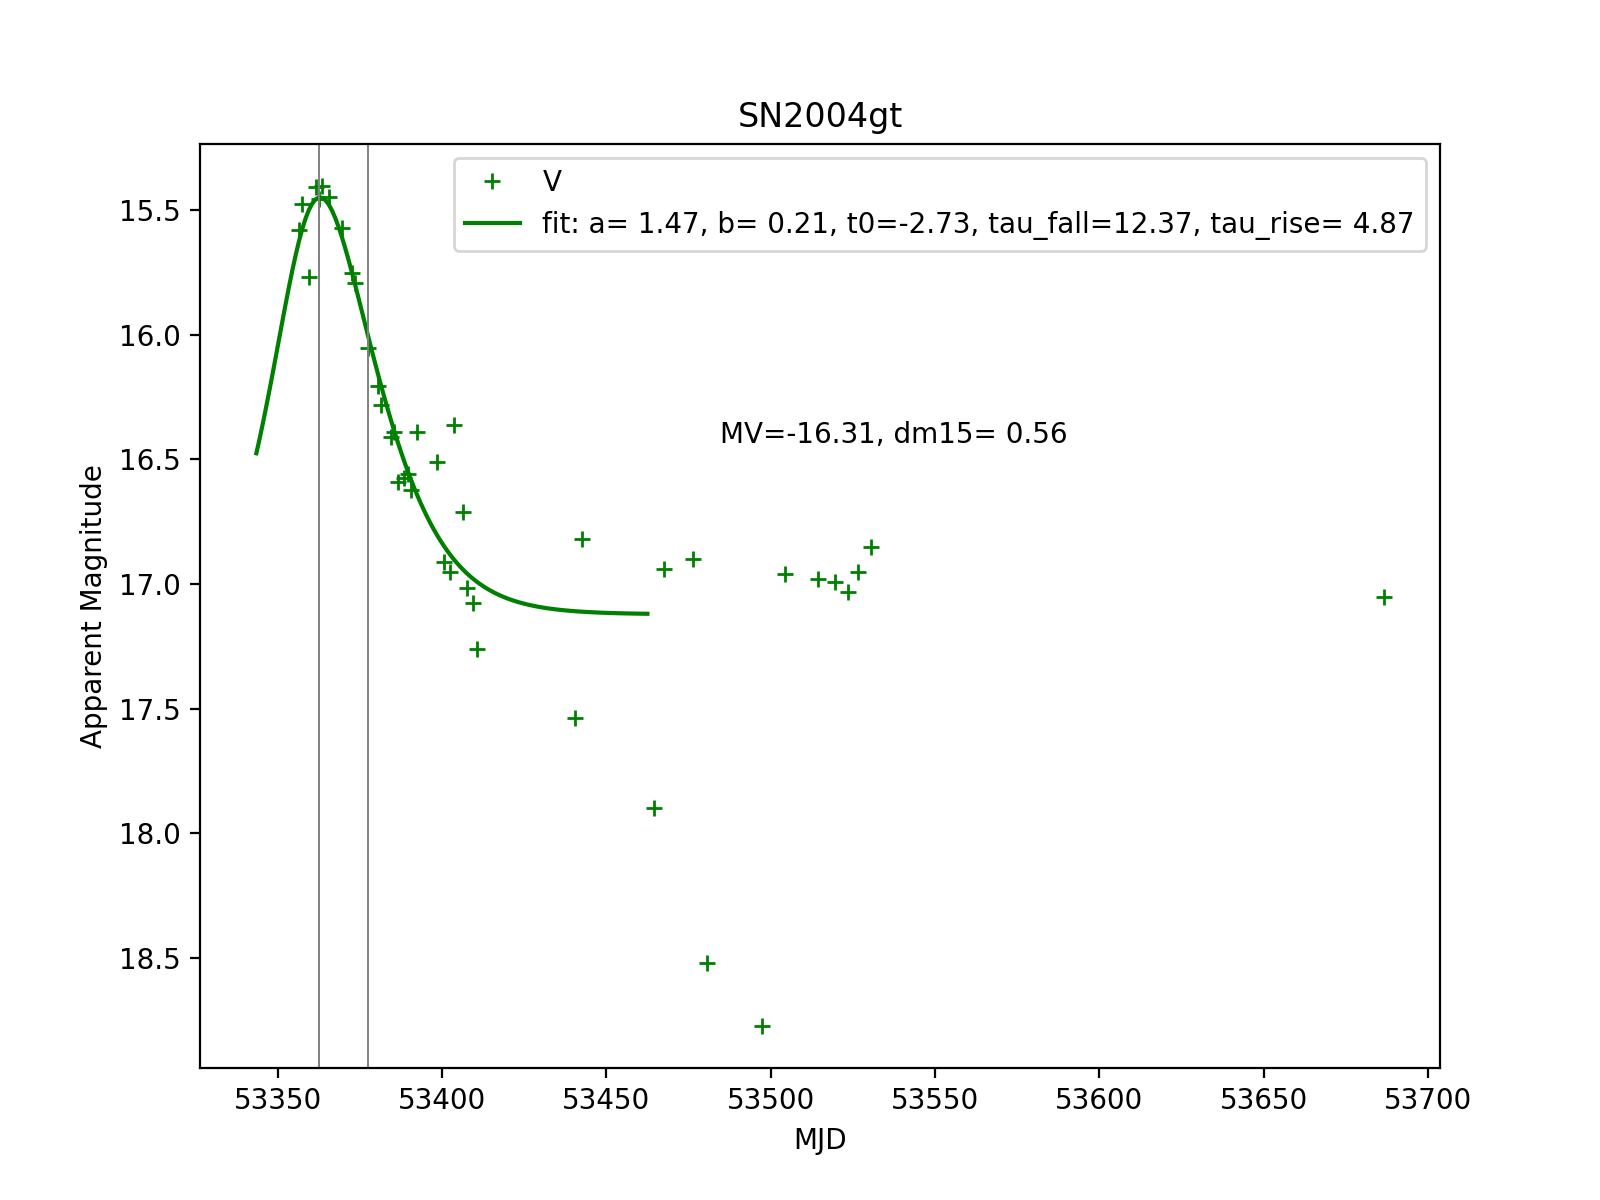

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


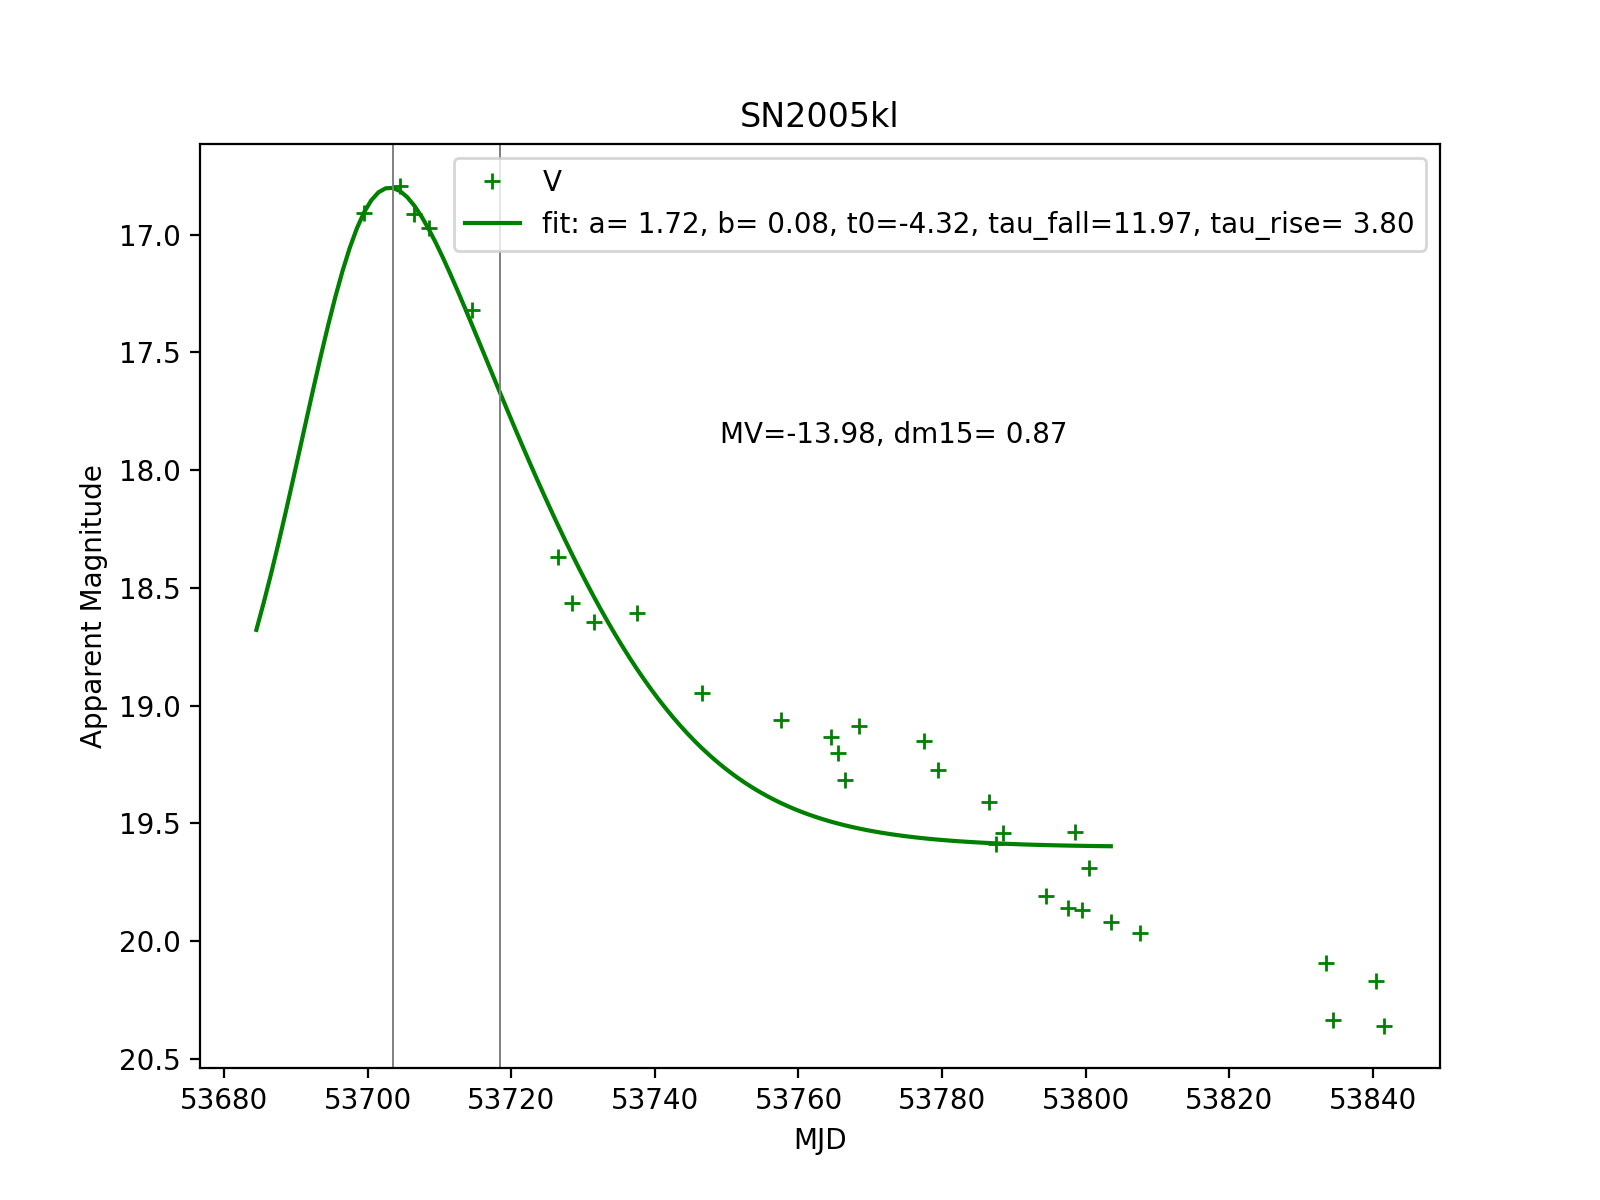

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


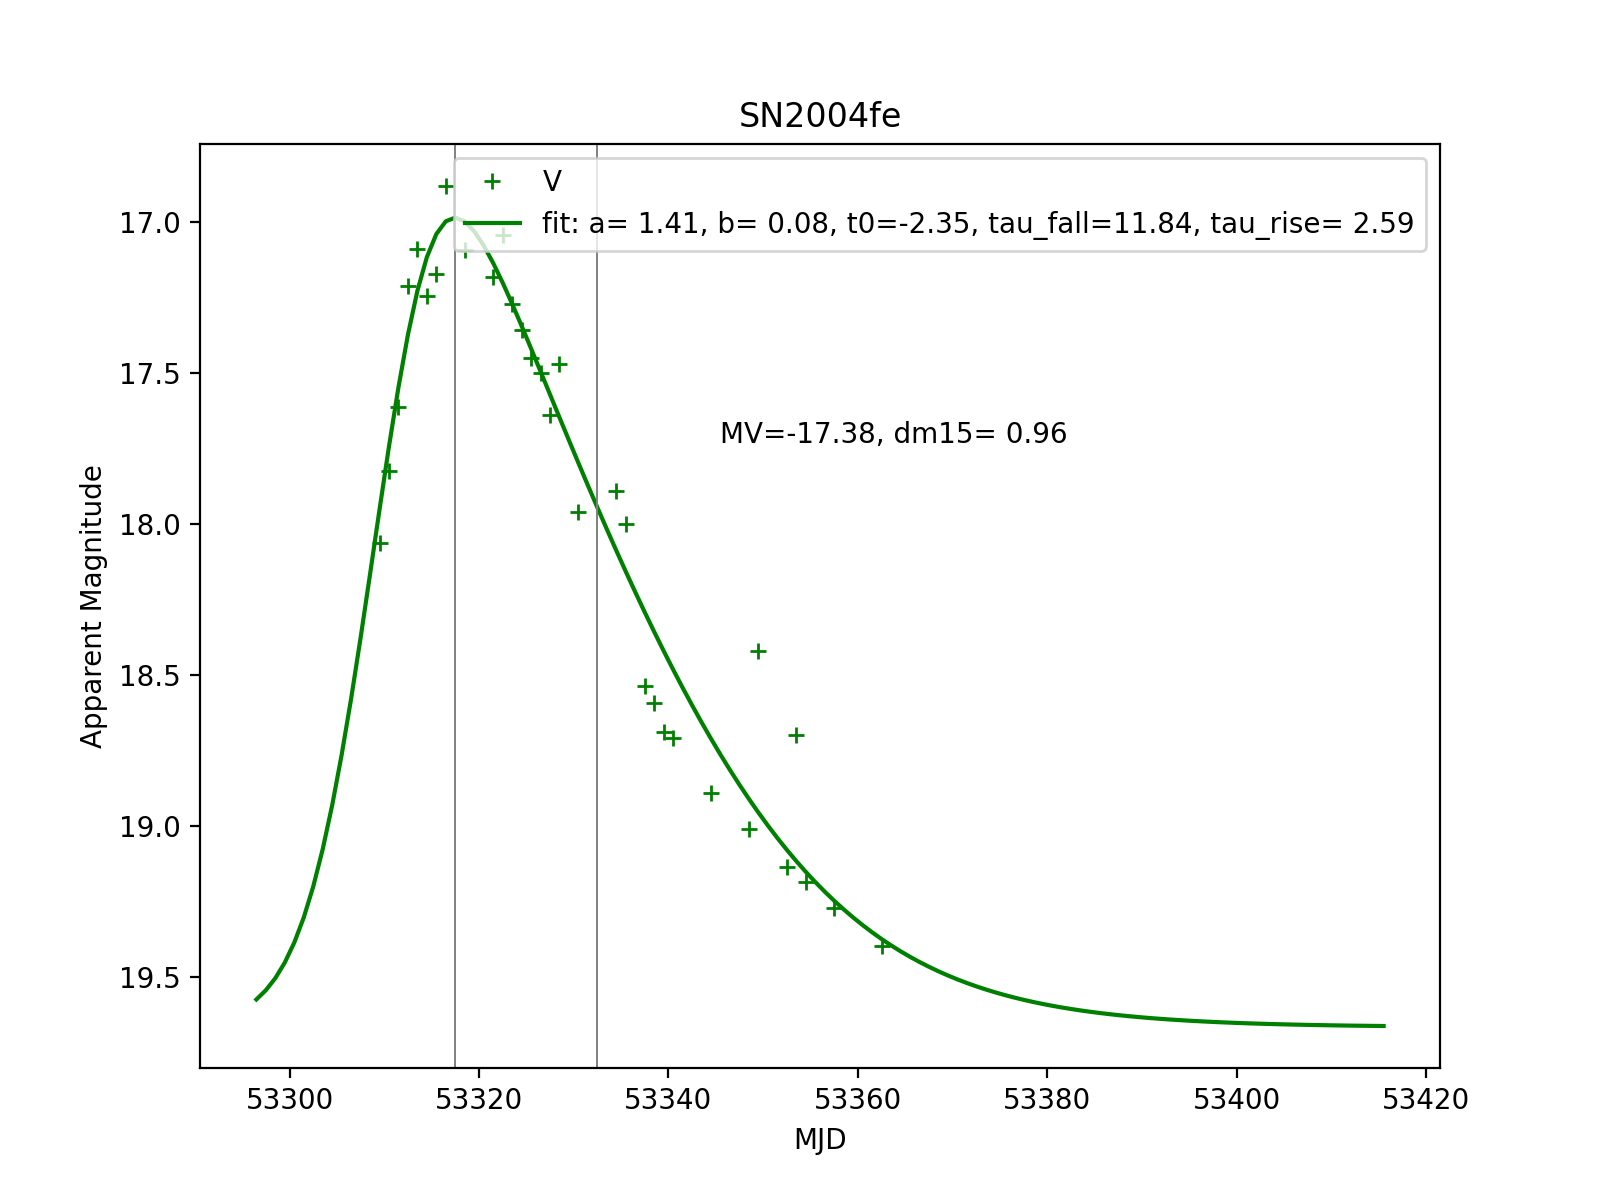

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


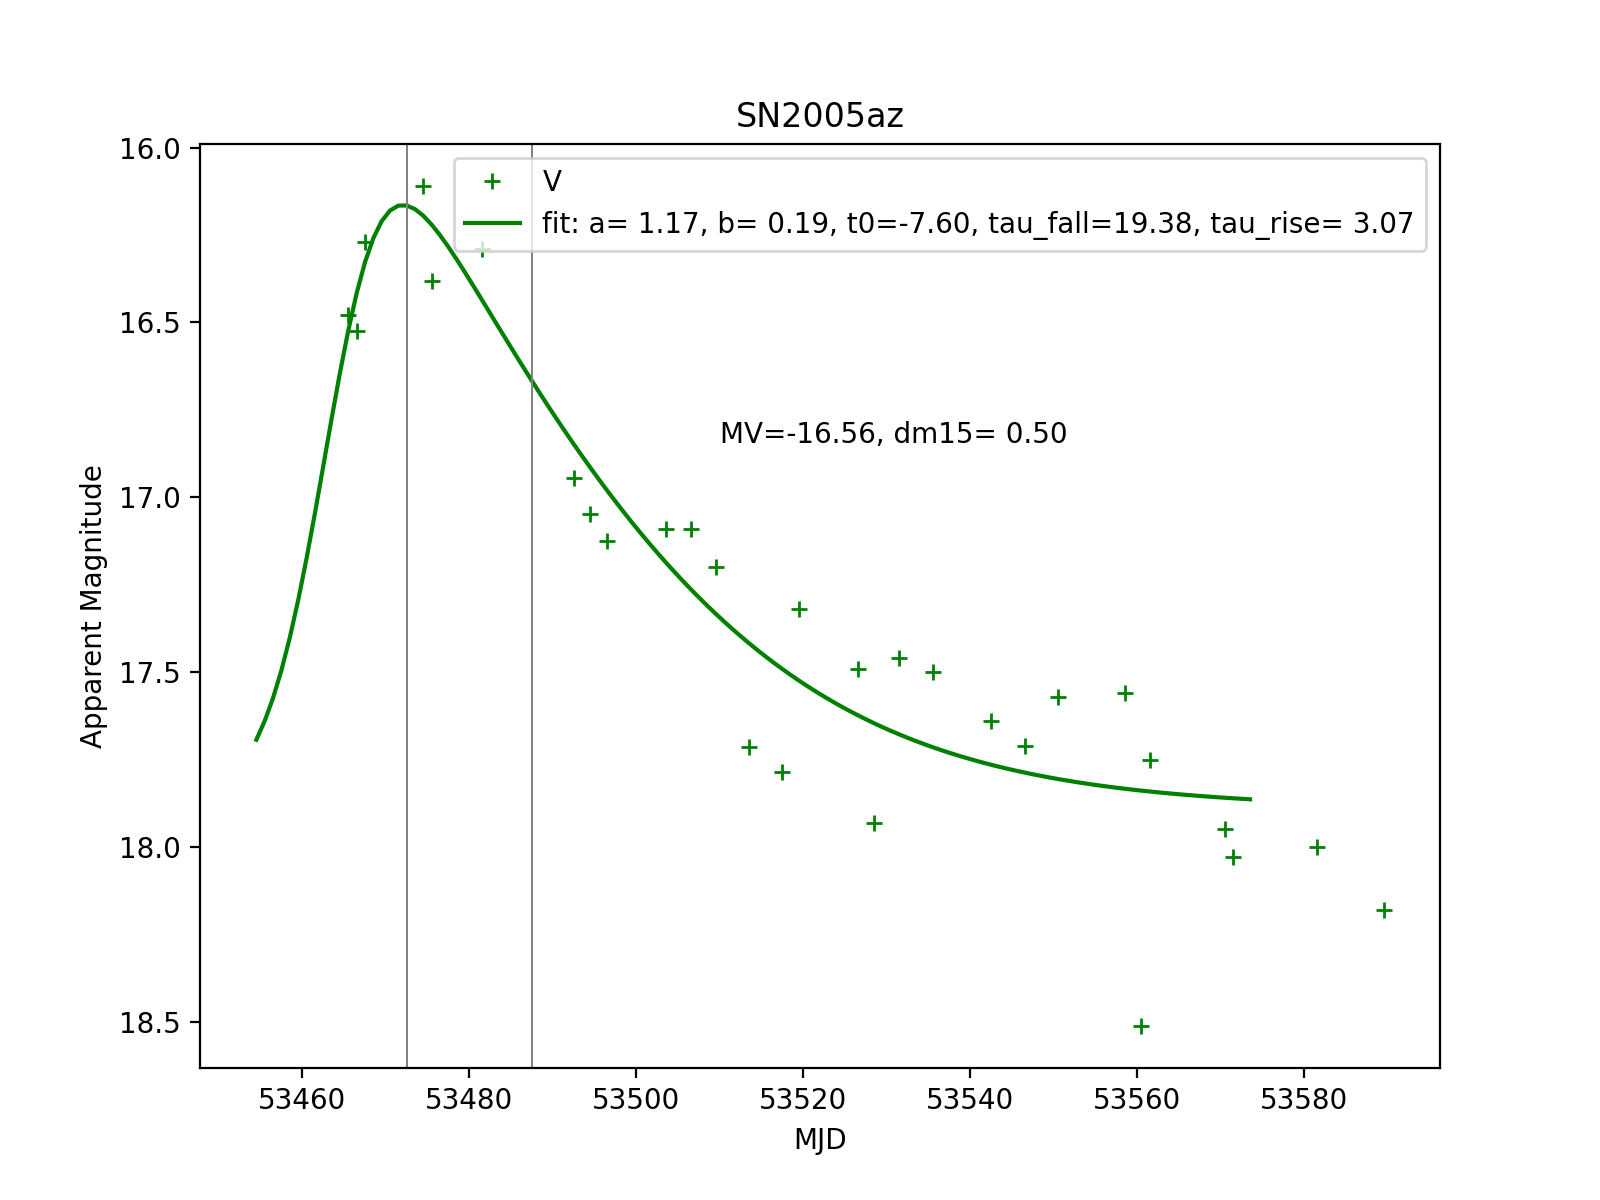

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:234: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:195: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/anaconda3/lib/python3.7/site-p

<IPython.core.display.Javascript object>


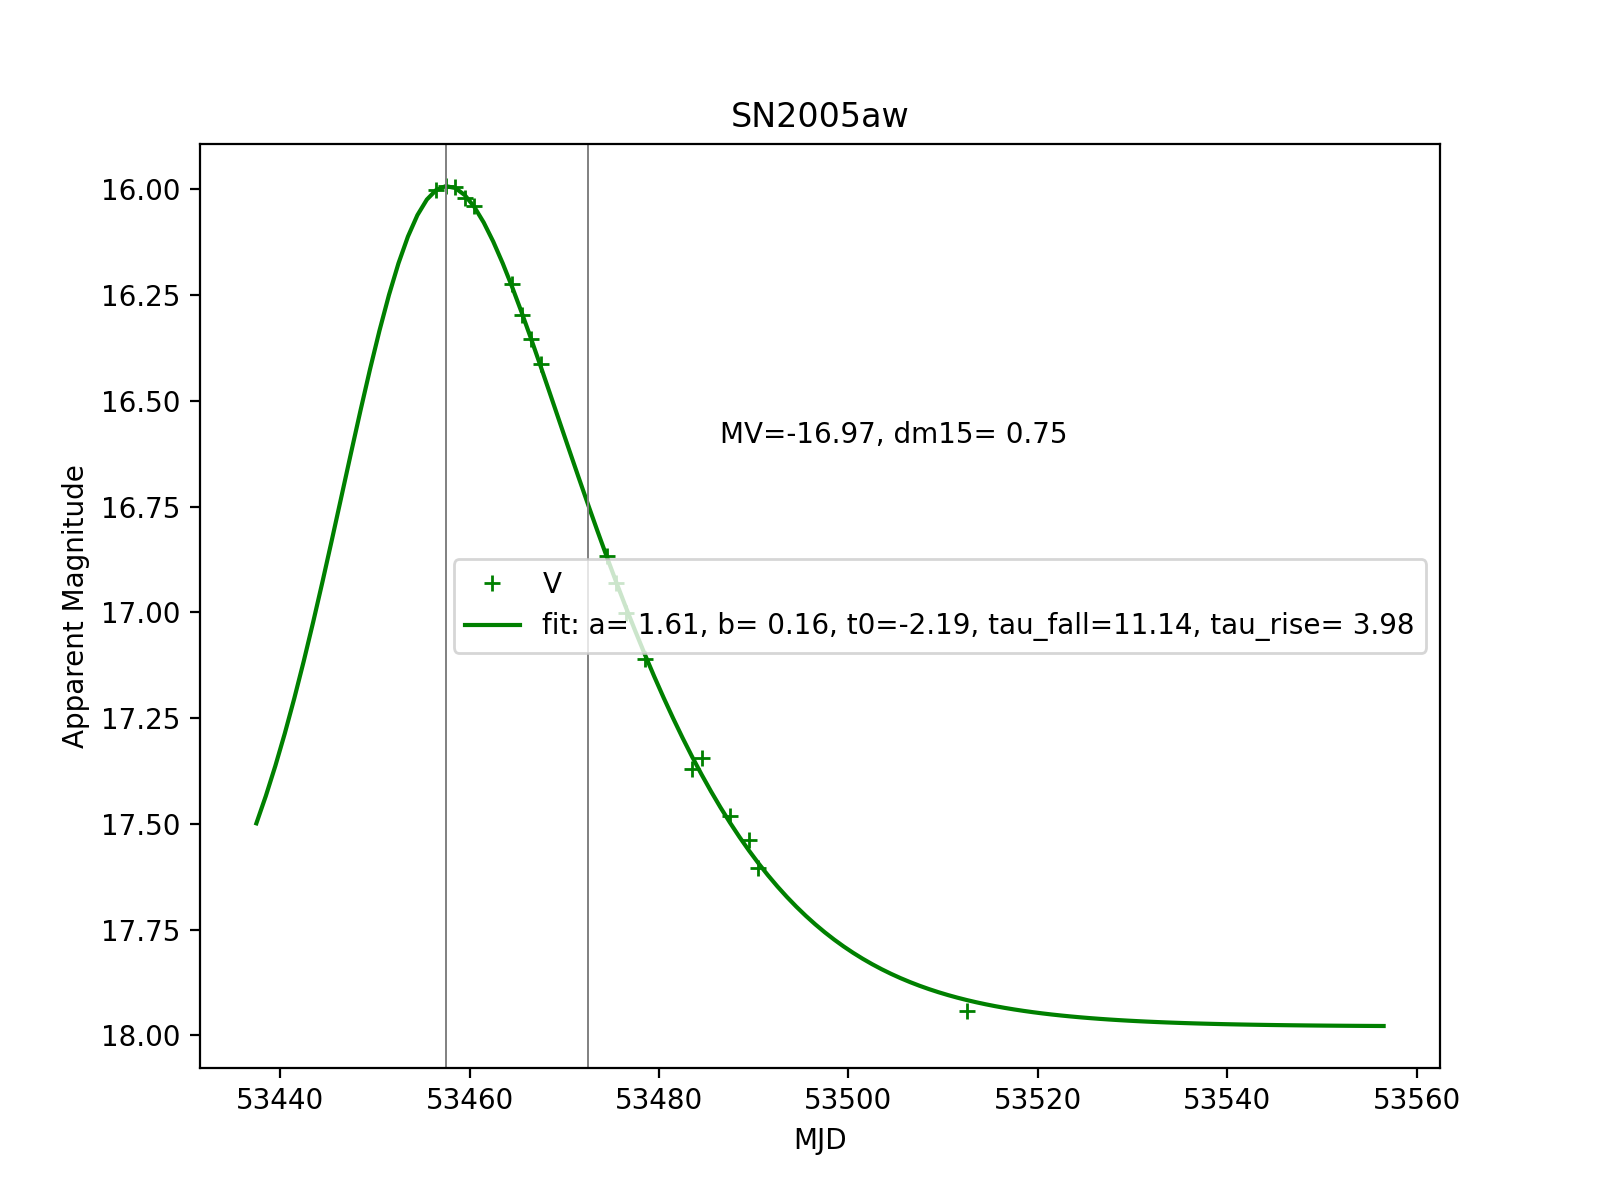

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


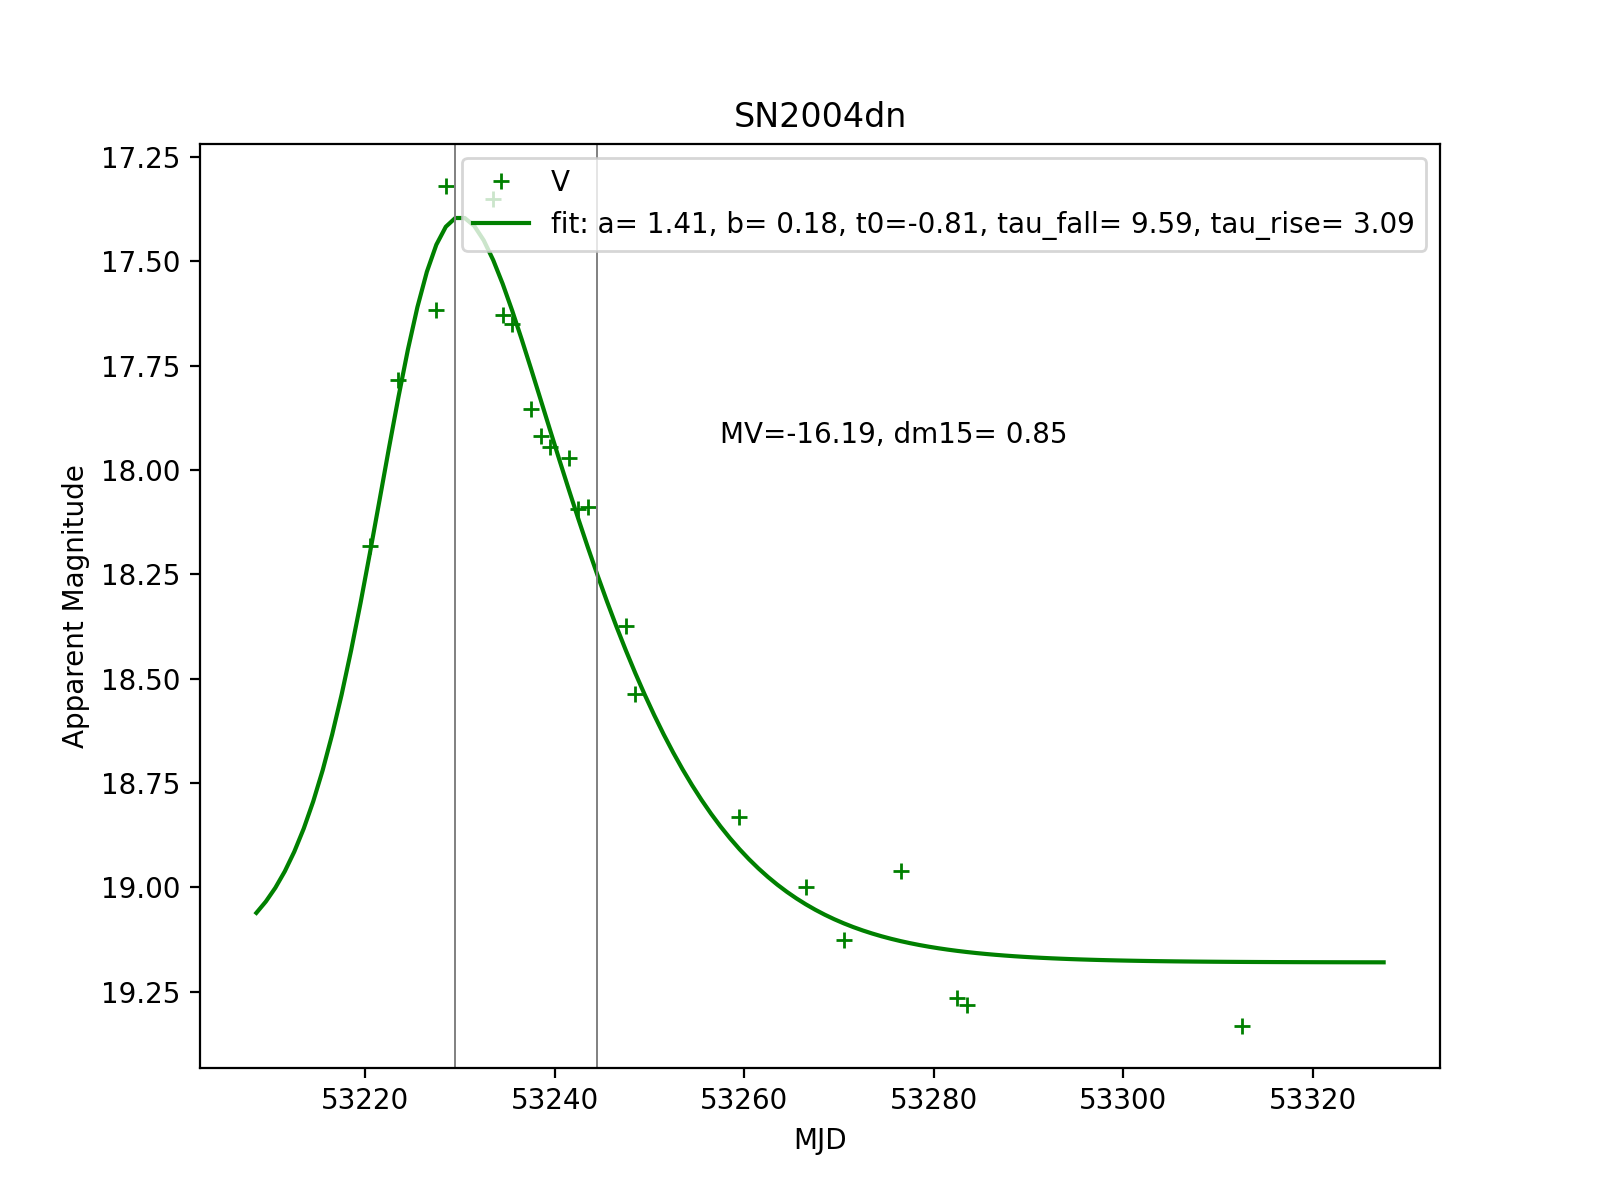

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


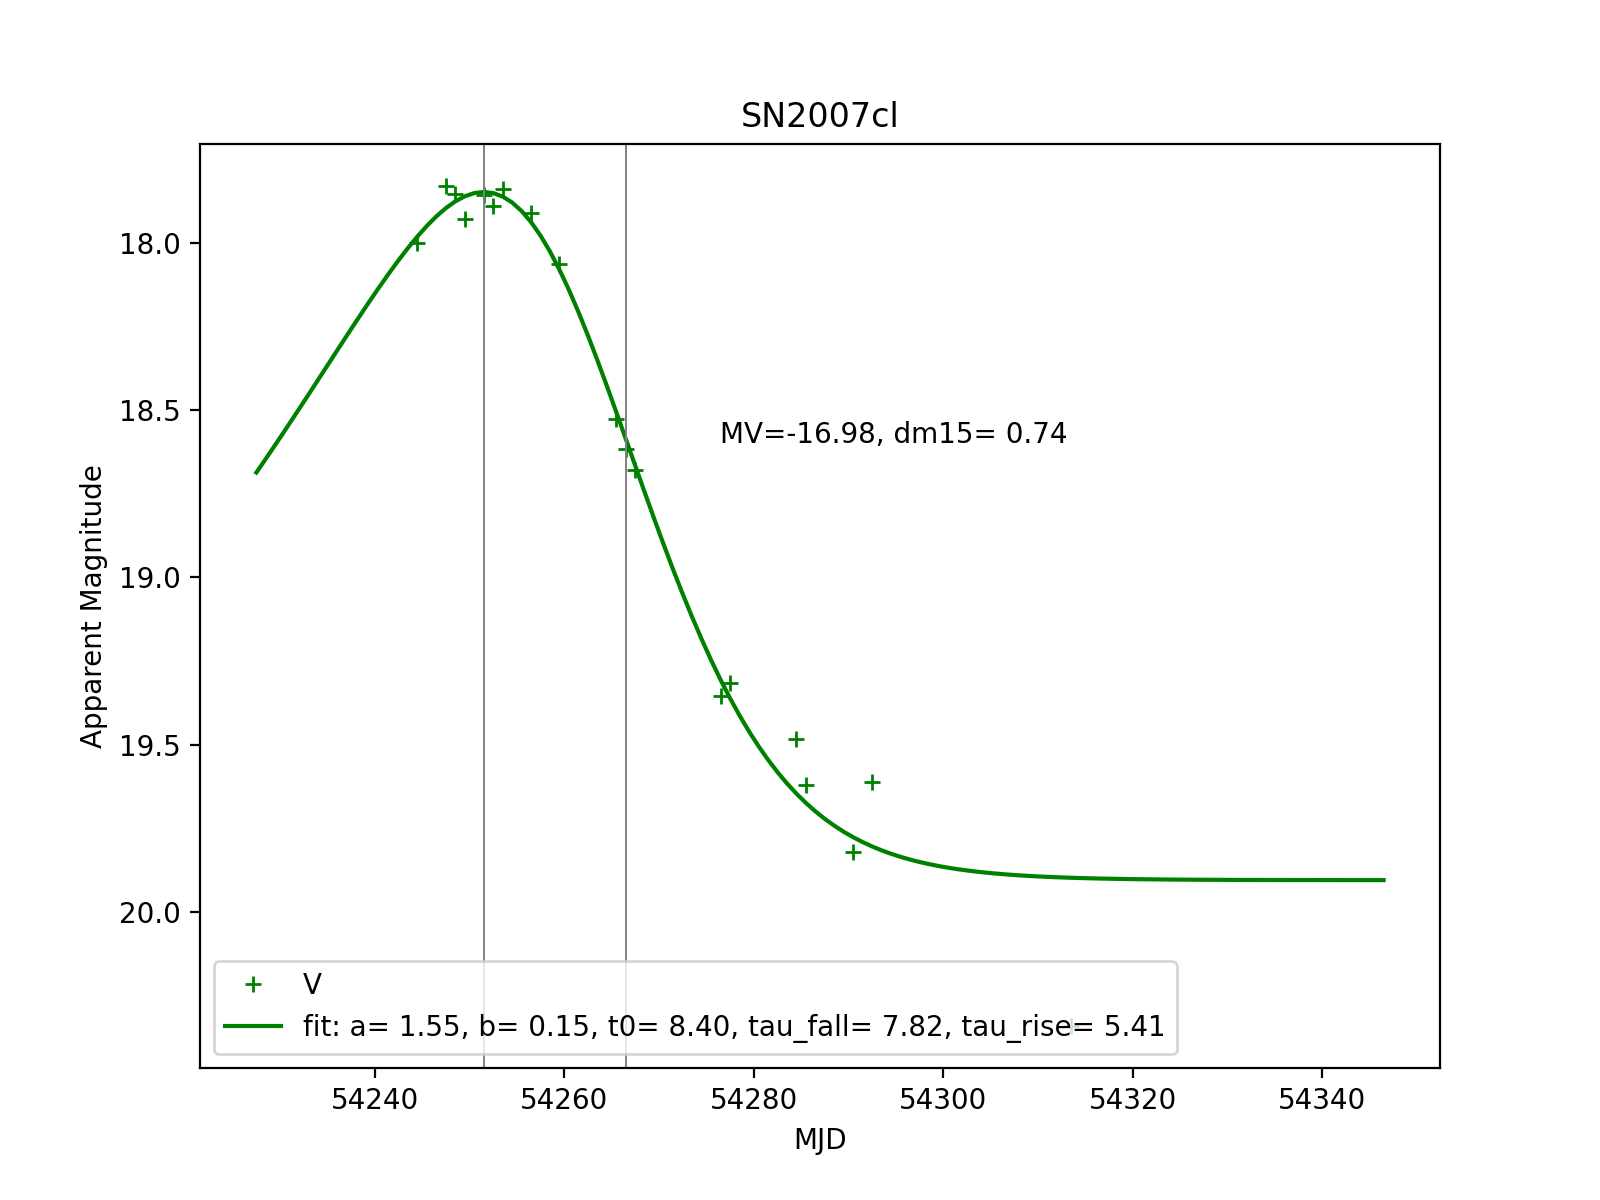

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


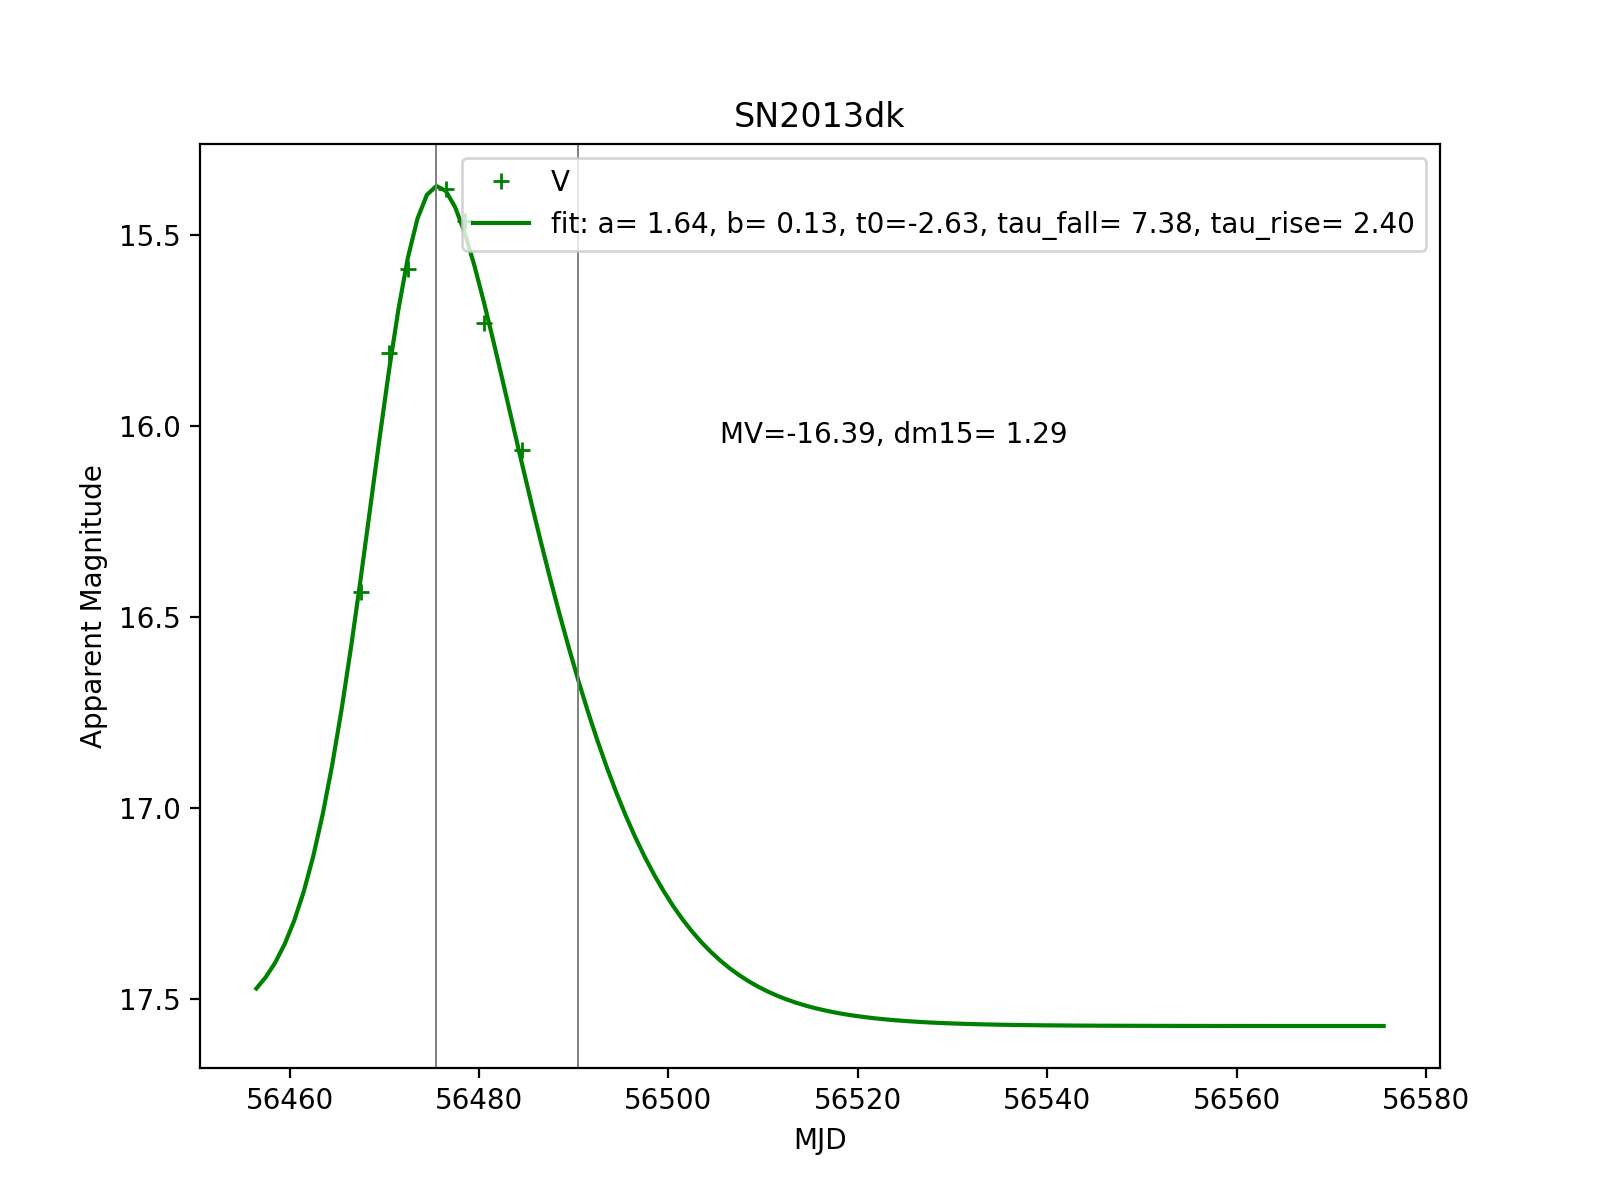

/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:233: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
/anaconda3/lib/python3.7/site-packages/gp_multistate_kernel-0.0.11-py3.7.egg/multistate_kernel/util.py:236: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


<IPython.core.display.Javascript object>


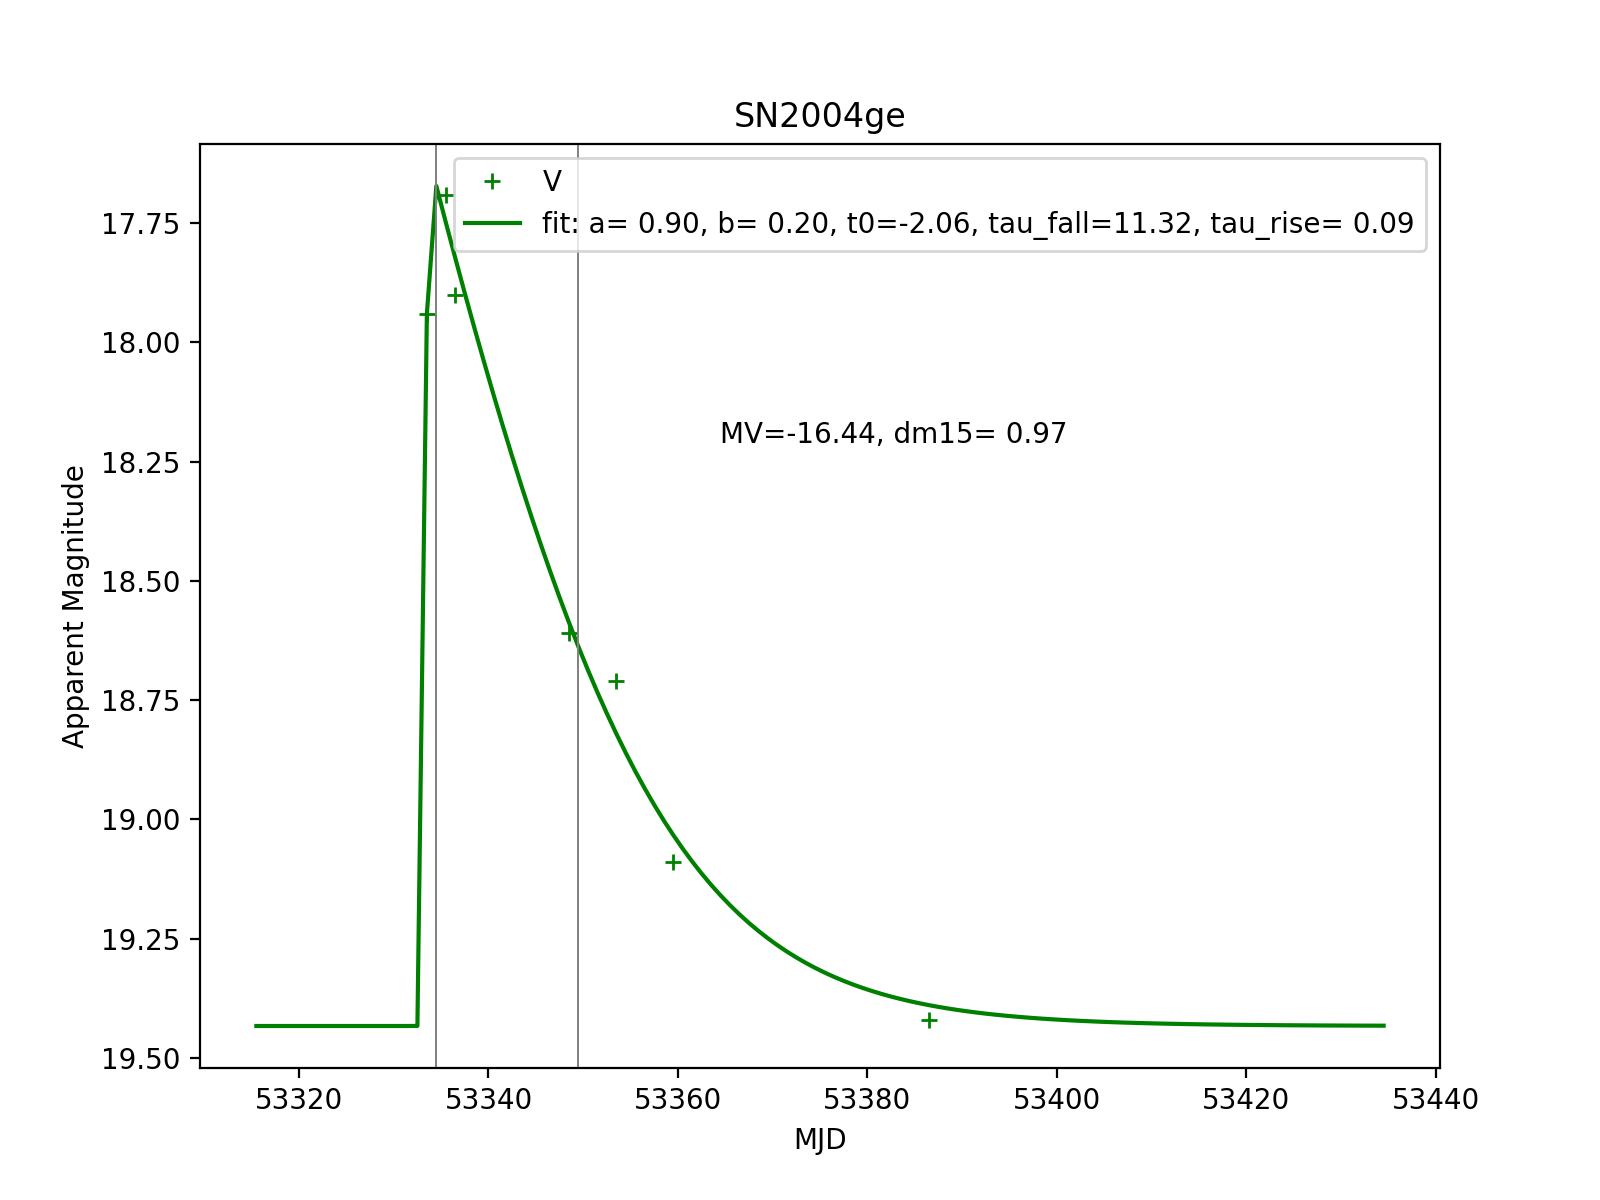

In [10]:
# Approximation with Bazin function

sn_list = ascii.read(pw + 'SNIc/sn_Ic_V.txt', format='no_header')  

time = range(-20, 100, 1)

AbsMag = []
dm15 = []
fail = []

for k in sn_list:
    i = k[0]
    try:
        data = OSCCurve.from_name(i, bands="V").binned(bin_width=1, discrete_time=True)
        data_filt = data.filtered(with_upper_limits=False, with_inf_e_flux=False, sort='filtered')

        t_max = data_filt.odict['V'].x[np.where(data_filt.odict['V'].y == np.max(data_filt.odict['V'].y))]
        norm = np.max(data_filt.odict['V'].y)

        xdata = data_filt.odict['V'].x - t_max
        ydata = data_filt.odict['V'].y / norm

        popt, pcov = curve_fit(bazin, xdata, ydata, bounds=([0, -np.inf, -50, 0, 0], [np.inf, np.inf, 150, 100, 200]))

        t_max_fit = time[np.where(bazin(time, *popt) == np.max(bazin(time, *popt)))[0][0]]
        bazin_mag = -2.5*np.log10(bazin(time, *popt) * norm)

        # absolute magnitude in V
        redshift = data.redshift[0]

        mu = fitfundL([redshift], omgM_scolnic)
        M_V_max = - 2.5*np.log10(np.max(bazin(time, *popt)) * norm) - mu
        AbsMag.append(M_V_max)

        # LC par
        delta_m15 = -2.5*np.log10(bazin(t_max_fit + 15, *popt) * norm) + 2.5*np.log10(bazin(t_max_fit, *popt) * norm)
        dm15.append(delta_m15)

        # plotting
        fig = plt.figure(figsize=(8,6))
        ax = fig.add_subplot()

        ax.plot(xdata + t_max,  -2.5*np.log10(ydata * np.max(data_filt.odict['V'].y)), 'g+', label = 'V')
        ax.plot(time + t_max, bazin_mag, 'g-', label='fit: a=%5.2f, b=%5.2f, t0=%5.2f, tau_fall=%5.2f, tau_rise=%5.2f' % tuple(popt))

        ax.axvline(t_max_fit + t_max, color = 'gray', lw = 0.7)
        ax.axvline(t_max_fit + t_max + 15, color = 'gray', lw = 0.7)

        ax.text(.7, .7, s='MV=%2.2f, dm15=%5.2f' % (M_V_max,delta_m15),
        ha='right', va='top',
        transform=ax.transAxes)
        ax.set_title(i)
        ax.set_xlabel('MJD')
        ax.set_ylabel('Apparent Magnitude')
        ax.legend()
        plt.gca().invert_yaxis()
        fig.savefig(pw + '/SNIc/lc_plots/' + i)
        
    except:
        fail.append(i)


<IPython.core.display.Javascript object>


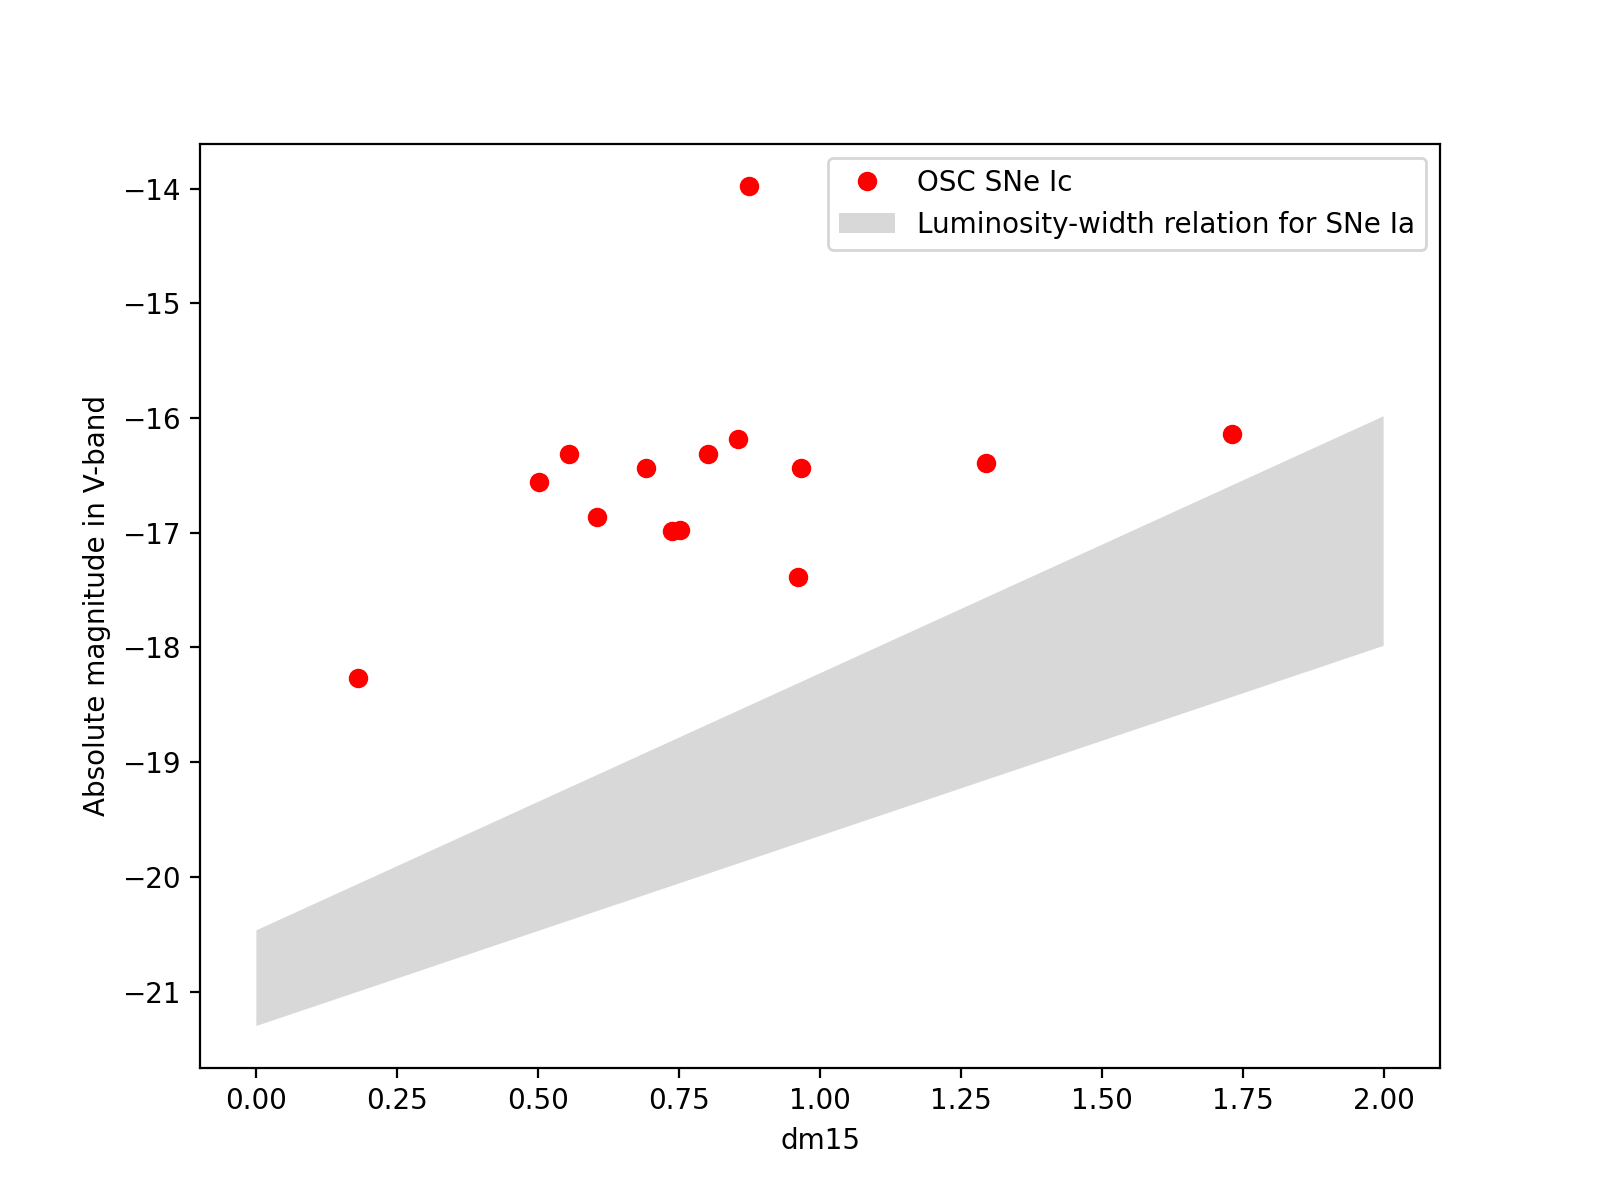

In [11]:
# V-abs magnitude vs dm15
# comparison with SN Ia luminosity-width relation
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot()

x = np.linspace(0., 2., num=50)
ax.fill_between(x, lw_relation(-21.3,1.657,x), lw_relation(-20.466,2.241,x), facecolor='gray', alpha=0.3, label = "Luminosity-width relation for SNe Ia")
    
    
ax.plot(dm15,AbsMag,'ro', label = "OSC SNe Ic")
ax.set_xlabel('dm15')
ax.set_ylabel('Absolute magnitude in V-band')
ax.legend()

fig.savefig(pw + '/SNIc/Mv_dm15')